# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


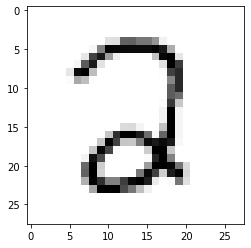

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2515056605992278
train accuracy is: 0.6184276414621933, test accuracy is 0.6300403225806451


Epoch 10 Loss 0.09621606720730051
train accuracy is: 0.9110332164914038, test accuracy is 0.9304435483870968


Epoch 20 Loss 0.05914508944245013
train accuracy is: 0.9369888165581706, test accuracy is 0.9490927419354839


Epoch 30 Loss 0.046282337674735025
train accuracy is: 0.9489233850776164, test accuracy is 0.9596774193548387


Epoch 40 Loss 0.03984738893826218
train accuracy is: 0.9550158571190118, test accuracy is 0.9637096774193549


Epoch 50 Loss 0.035896842397302425
train accuracy is: 0.9593557002169921, test accuracy is 0.9662298387096774


Epoch 60 Loss 0.0331490328934265
train accuracy is: 0.9620263728926723, test accuracy is 0.9692540322580645


Epoch 70 Loss 0.031075013107623572
train accuracy is: 0.9645301285261225, test accuracy is 0.9712701612903226


Epoch 80 Loss 0.02941777088645805
train accuracy is: 0.9661158404273076, test accuracy is 0.9717741935483871


Epoch 90 Loss 0.02805681702187696
train accuracy is: 0.9676180938073777, test accuracy is 0.9722782258064516


Epoch 100 Loss 0.026908029622376962
train accuracy is: 0.9686195960607578, test accuracy is 0.9712701612903226


Epoch 110 Loss 0.025899125980301446
train accuracy is: 0.9697880153563679, test accuracy is 0.9717741935483871


Epoch 120 Loss 0.02502283437686068
train accuracy is: 0.9711233516942079, test accuracy is 0.9722782258064516


Epoch 130 Loss 0.02423024205607828
train accuracy is: 0.972041395426473, test accuracy is 0.9727822580645161


Epoch 140 Loss 0.02352246075621728
train accuracy is: 0.9730428976798531, test accuracy is 0.9727822580645161


Epoch 150 Loss 0.022861587739271837
train accuracy is: 0.9736271073276581, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.022251555244886177
train accuracy is: 0.9746286095810383, test accuracy is 0.9727822580645161


Epoch 170 Loss 0.021686528722236583
train accuracy is: 0.9754631947921882, test accuracy is 0.9727822580645161


Epoch 180 Loss 0.021158154775811587
train accuracy is: 0.9758804873977633, test accuracy is 0.9732862903225806


Epoch 190 Loss 0.020660599456339867
train accuracy is: 0.9759639459188784, test accuracy is 0.9732862903225806


Epoch 200 Loss 0.020184386873747483
train accuracy is: 0.9767150726089133, test accuracy is 0.9737903225806451


Epoch 210 Loss 0.0197373188461167
train accuracy is: 0.9774661992989484, test accuracy is 0.9737903225806451


Epoch 220 Loss 0.019302492941344986
train accuracy is: 0.9782173259889835, test accuracy is 0.9742943548387096


Epoch 230 Loss 0.018879583327297073
train accuracy is: 0.9788849941579035, test accuracy is 0.9742943548387096


Epoch 240 Loss 0.018468971089334485
train accuracy is: 0.9793022867634785, test accuracy is 0.9742943548387096


0.010861370859609653

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23391341433293564
train accuracy is: 0.7183274912368552, test accuracy is 0.7303427419354839


Epoch 10 Loss 0.09836957170518382
train accuracy is: 0.9196294441662494, test accuracy is 0.9289314516129032


Epoch 20 Loss 0.07684020482657962
train accuracy is: 0.9318143882490403, test accuracy is 0.9400201612903226


Epoch 30 Loss 0.06677650710174919
train accuracy is: 0.9381572358537806, test accuracy is 0.9460685483870968


Epoch 40 Loss 0.06063218738444567
train accuracy is: 0.942163244867301, test accuracy is 0.9506048387096774


Epoch 50 Loss 0.05640069907575286
train accuracy is: 0.9455850442330161, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.05326768614893975
train accuracy is: 0.9480887998664663, test accuracy is 0.9551411290322581


Epoch 70 Loss 0.05083140625268069
train accuracy is: 0.9496745117676515, test accuracy is 0.9581653225806451


Epoch 80 Loss 0.04887006754877406
train accuracy is: 0.9510098481054916, test accuracy is 0.9606854838709677


Epoch 90 Loss 0.04724531840253592
train accuracy is: 0.9517609747955266, test accuracy is 0.9606854838709677


Epoch 100 Loss 0.045874292082774056
train accuracy is: 0.9527624770489067, test accuracy is 0.9616935483870968


Epoch 110 Loss 0.04469229331681306
train accuracy is: 0.9537639793022867, test accuracy is 0.9616935483870968


Epoch 120 Loss 0.04366369526663653
train accuracy is: 0.9551827741612419, test accuracy is 0.9616935483870968


Epoch 130 Loss 0.042755251276468495
train accuracy is: 0.9556835252879319, test accuracy is 0.9627016129032258


Epoch 140 Loss 0.041946374745901134
train accuracy is: 0.9561842764146219, test accuracy is 0.9627016129032258


Epoch 150 Loss 0.04121820080684727
train accuracy is: 0.956601569020197, test accuracy is 0.9632056451612904


Epoch 160 Loss 0.040559064393451374
train accuracy is: 0.957102320146887, test accuracy is 0.9637096774193549


Epoch 170 Loss 0.03995855581356412
train accuracy is: 0.957102320146887, test accuracy is 0.9642137096774194


Epoch 180 Loss 0.03940756621232857
train accuracy is: 0.9578534468369221, test accuracy is 0.9632056451612904


Epoch 190 Loss 0.0389007140119299
train accuracy is: 0.9584376564847271, test accuracy is 0.9632056451612904


Epoch 200 Loss 0.03843115596440942
train accuracy is: 0.9588549490903021, test accuracy is 0.9637096774193549


Epoch 210 Loss 0.037995232140534956
train accuracy is: 0.9592722416958771, test accuracy is 0.9642137096774194


Epoch 220 Loss 0.037588476591724526
train accuracy is: 0.9596060757803372, test accuracy is 0.9642137096774194


Epoch 230 Loss 0.03720837267779849
train accuracy is: 0.9597729928225672, test accuracy is 0.9642137096774194


Epoch 240 Loss 0.0368509315750234
train accuracy is: 0.9604406609914873, test accuracy is 0.9642137096774194


0.05262092253071638

### Comparing results of NN and LR

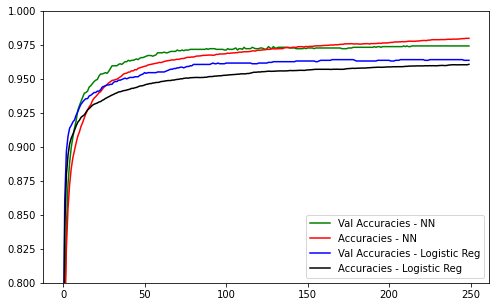

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

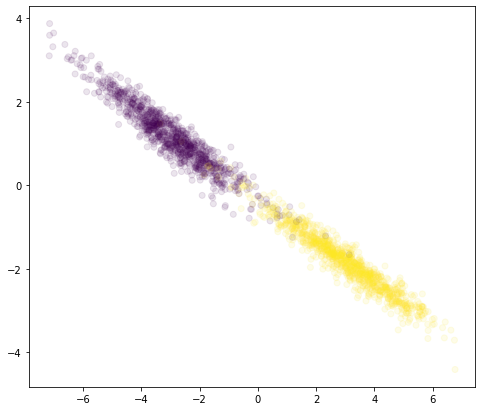

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

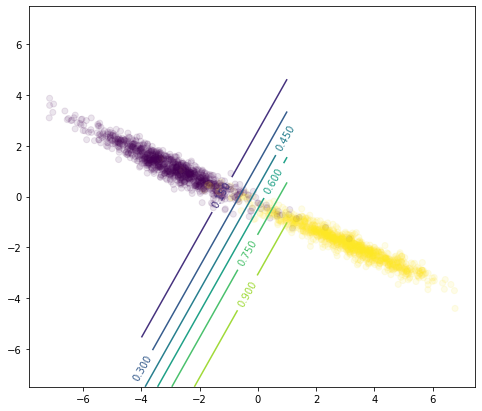

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );